<a href="https://www.kaggle.com/code/ayushs9020/re-creating-the-function-transformers?scriptVersionId=134120119" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Function Transformers

So what is a transformer ??. And why do we really need that??

**What** - A transformer basically is a `function` which `changes` the `input` into a `normal ditribution/Gaussian Distribution`

**If you dont know what is Gaussian Distribution, Dont worry, Just go through the notebook :)**

**Modules**
* Numpy
* Pandas
* Matplotlib
* Seaborn

# 1 | Basic Terminlogies 📃
* Skewness
* Gaussian Curve/Normal Distribution Curve

In [1]:
import numpy as np 
import seaborn as sns

## 1.1 | Skewness
So what is this skewness???

Lets assume we have an array like this.. 

In [2]:
sample_array = np.array([x**2 for x in range(200)])
sample_array

array([    0,     1,     4,     9,    16,    25,    36,    49,    64,
          81,   100,   121,   144,   169,   196,   225,   256,   289,
         324,   361,   400,   441,   484,   529,   576,   625,   676,
         729,   784,   841,   900,   961,  1024,  1089,  1156,  1225,
        1296,  1369,  1444,  1521,  1600,  1681,  1764,  1849,  1936,
        2025,  2116,  2209,  2304,  2401,  2500,  2601,  2704,  2809,
        2916,  3025,  3136,  3249,  3364,  3481,  3600,  3721,  3844,
        3969,  4096,  4225,  4356,  4489,  4624,  4761,  4900,  5041,
        5184,  5329,  5476,  5625,  5776,  5929,  6084,  6241,  6400,
        6561,  6724,  6889,  7056,  7225,  7396,  7569,  7744,  7921,
        8100,  8281,  8464,  8649,  8836,  9025,  9216,  9409,  9604,
        9801, 10000, 10201, 10404, 10609, 10816, 11025, 11236, 11449,
       11664, 11881, 12100, 12321, 12544, 12769, 12996, 13225, 13456,
       13689, 13924, 14161, 14400, 14641, 14884, 15129, 15376, 15625,
       15876, 16129,

If we see how it looks

<Axes: ylabel='Density'>

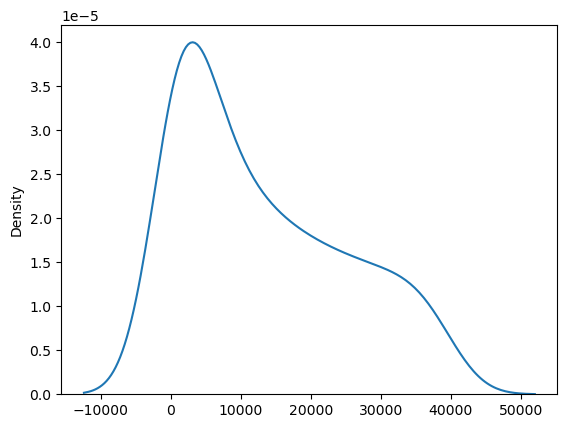

In [3]:
sns.kdeplot(sample_array)

You can see this `sample_array` is `slightly shifted towards left`, it looks like a steep sofa 

**Machine Learning do not like data like this, it kinda of hates it. I know machine cant tell us that it hates or loves, but belive me, it came to me and told me this :)**

It also told me what it likes

So as it is our own machine it is our responisbility to keep it happy.

**So our main goal is to convert this data into a data that machine likes.**

But first of all what do machine likes???

It is the `Gaussian Curve` or `Normal Distribution Curve` that it like

Wait Wait Wait, What is Normal/Gaussian Distribution???

## 1.2 | Gaussian Distribution

A **Normal/Gaussian Distribution** is a distribution that is in a `bell like shape`.

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F9711370%2F38caa1e7d9068632f24a8ec0c5f318fa%2F360_F_117733913_tSNSnfILeFniF4u7DmGE5HkFUTcA7XAr.jpg?generation=1678681913469594&alt=media)

Notice a bell like curve in all the graphs ? 

Computer and nature just likes these formations and datasets that make these. So our main focus is to make normal distributions. We can do this by using the fancy word `FunctionTransformer`

**Why** - Straight to the point, we use a `transformer` to `reduce` the `time complexity` of a model and `increase` its `accuracy`.

Now comes another question. How can we actually do this

**How** - So there are as usual two ways to implement the transformer

* **Using specialized libraries** - Obviously one of the all rounder library the `scikit-learn` gives us the ability to easily apply a transformer on any custom function you want 

* **Making your own transformer** - You can always make stuff by yourself, this gives you `a lot of understanding` of the `concept` and provides you a lot of `pseudo knowledge`.

So now you have a baisc Idea of what is `Skewness` and `Gaussian Curve`. 

Remeber we had taken a `sample_data`??

Lets try to calculate the skewness of that data

The skewness $sk$ of a data with $n$ values, having the mean $x_{mean}$ and standard deviation $\sigma$ can be given by 

$$sk = \frac {\sum\limits_{i = 1}^{n}(x_i - x_{mean})^3}{(n - 1)\sigma^3}$$

# 3 | Data 📊

In [4]:
import pandas as pd
from IPython.display import IFrame
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


Lets assume we have the data like this 

In [5]:
data = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/train.csv")
data

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


`AB` seems to be a good one for this, so we will be focusing on this

<Axes: xlabel='AB', ylabel='Density'>

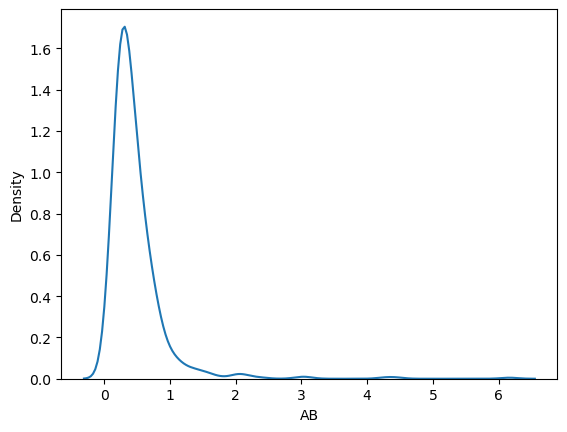

In [6]:
sample_data = data["AB"]
sns.kdeplot(sample_data)

If we want to get the skewness of the data 

In [7]:
sample_data.skew()

5.927244953857909

As you can see the skewness is $5.92$, models like gaussian disitribution graph, so our main motive is to minimize the skewess and make the curve more like a bell shaped.

The first in the list is 
# 4 | Log Transformer ⚙️

The transformer works on a simple formula 

$$f(x) = \Bigg [ \frac {log(x)}{log(x+1)}\frac {if}{if}\frac {x!=0}{x = 0}$$

In [8]:
IFrame("https://www.desmos.com/calculator/crequa4ti2" , 1000 , 400)

For changing every value in an array, we simply need to iterate over the array and change the values. We will first try to access these values. As it can go very further, we will limit the output to $5$ lines

In [9]:
count = 0
for i in sample_data: #-----|
    print(i) #--------------|=======> Main code
    count +=1
    if count == 5:
        break

0.209377
0.145282
0.47003
0.252107
0.380297


Now we will try to make a new array, and add these values in that array, we will transform the values afterward, but first we will try to populate a new array 

This will give the following Error

```
new_array = np.array([])
for i in sample_data:
    new_array = np.vstack([new_array , i])
    
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
/tmp/ipykernel_27/1678135359.py in <module>
      1 new_array = np.array([])
      2 for i in sample_data:
----> 3     new_array = np.vstack([new_array , i])

<__array_function__ internals> in vstack(*args, **kwargs)

/opt/conda/lib/python3.7/site-packages/numpy/core/shape_base.py in vstack(tup)
    280     if not isinstance(arrs, list):
    281         arrs = [arrs]
--> 282     return _nx.concatenate(arrs, 0)
    283 
    284 

<__array_function__ internals> in concatenate(*args, **kwargs)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 0 and the array at index 1 has size 1
```

As we can see there is an error, regarding the incorrect shape. It says the array you are trying to stack is of $(1 , 1)$ but the arrays you are trying to stck in is of shape $(0 , 0)$. 

So we need to make an empty array of the same shape.

In [10]:
new_array = np.empty(shape = (1 , 1))
for i in sample_data:
    new_array = np.vstack([new_array , i])
    
new_array

array([[5.92724495],
       [0.209377  ],
       [0.145282  ],
       [0.47003   ],
       [0.252107  ],
       [0.380297  ],
       [0.209377  ],
       [0.3482495 ],
       [0.269199  ],
       [0.346113  ],
       [0.324748  ],
       [0.504214  ],
       [0.760594  ],
       [0.491395  ],
       [0.534125  ],
       [0.508487  ],
       [0.666588  ],
       [0.252107  ],
       [0.448665  ],
       [0.269199  ],
       [0.132463  ],
       [0.55549   ],
       [0.546944  ],
       [0.247834  ],
       [0.371751  ],
       [0.158101  ],
       [0.235015  ],
       [1.448547  ],
       [0.273472  ],
       [0.1217805 ],
       [1.32463   ],
       [0.495668  ],
       [0.743502  ],
       [0.461484  ],
       [0.162374  ],
       [0.444392  ],
       [0.316202  ],
       [0.273472  ],
       [0.226469  ],
       [0.397389  ],
       [0.119644  ],
       [0.200831  ],
       [0.72641   ],
       [0.324748  ],
       [0.794778  ],
       [0.264926  ],
       [1.491277  ],
       [0.243

So now our most of the work is done, now we just need to change the value of `i` according to our need, for simplicity we will just create a function for this 

We will use `np.log1p()` instead of `np.log()`

This is because the case we cannot calculate the `log(0)`. 

Lets assume we have a `0` in our dataset. The function `np.log()`, will throw an error while trying to calculate `log(0)`. What `np.log1p()` do is, if it finds `0`, it adds one to it and then calculate the log, as `log(1)` is `0`. Neither the data changes nor we get obstructed 

In [11]:
new_array = np.empty(shape = (1 , 1))
for i in sample_data:
    new_array = np.vstack([new_array , np.log1p(i)])
    
new_array

array([[0.482849  ],
       [0.19010535],
       [0.13565089],
       [0.38528281],
       [0.22482773],
       [0.32229869],
       [0.19010535],
       [0.29880708],
       [0.23838599],
       [0.29722118],
       [0.28122225],
       [0.4082705 ],
       [0.56565125],
       [0.39971192],
       [0.42796019],
       [0.41110716],
       [0.51077842],
       [0.22482773],
       [0.37064244],
       [0.23838599],
       [0.12439491],
       [0.44179061],
       [0.43628137],
       [0.22140925],
       [0.31608803],
       [0.14678159],
       [0.21108312],
       [0.89549479],
       [0.24174703],
       [0.11491716],
       [0.84356089],
       [0.40257293],
       [0.55589573],
       [0.37945236],
       [0.15046447],
       [0.36768847],
       [0.27475032],
       [0.24174703],
       [0.20413931],
       [0.3346055 ],
       [0.11301078],
       [0.18301382],
       [0.54604411],
       [0.28122225],
       [0.58488134],
       [0.23501362],
       [0.91279543],
       [0.217

So now what will be the skewness of our data???

In [12]:
pd.DataFrame(new_array).skew()

0    2.581548
dtype: float64

You might be thinking why we changed to dataframe, that was because numpy do not in built have a skew function, for the moment we will be using `pd.DataFrame().skew()`

Lets try to plot this on a graph

<Axes: ylabel='Density'>

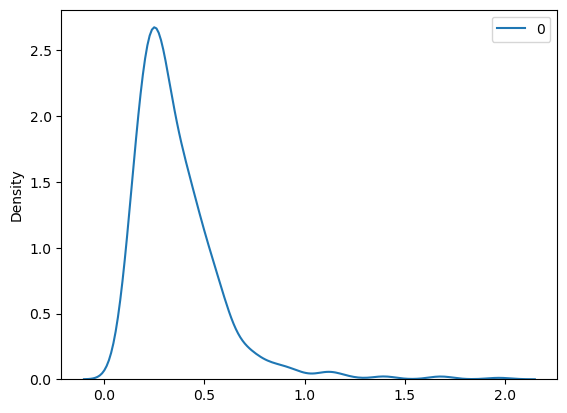

In [13]:
sns.kdeplot(new_array)

Notie how the graph changed, and the skewness is close to zero

Now as we have created our transformer, we will be adding some functionalities to the transformer like 
* iterating over a list

For this dummy we will be adding the `AF` column too. 

In [14]:
sample_data = data[["AB" , "AF"]]

#################
Skewness is :  5.927244953857909


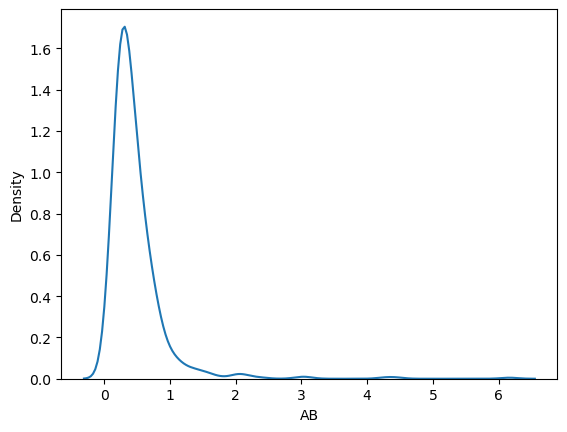

#################
Skewness is :  3.7510572992569435


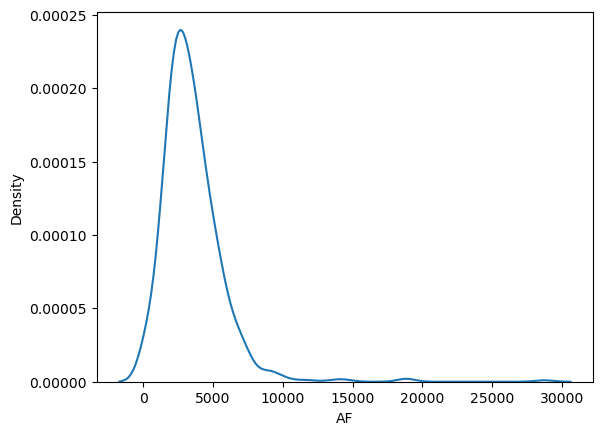

In [15]:
for i in sample_data.columns:
    print("#################")
    print("Skewness is : " , sample_data[i].skew())
    sns.kdeplot(sample_data[i])
    plt.show()

Lets try to iterate firstly over these columns

In [16]:
for i in sample_data:
    print(i)

AB
AF


Now we will add both our codes

In [17]:
def log_output(value):
    return np.log1p(value)

for i in sample_data:
    new_array = np.empty(shape = (1 , 1))
    for j in sample_data[i]:
        new_array = np.vstack([new_array , log_output(j)])

    new_array = np.delete(new_array , 0 , 0)

But there is a problem, we are not actually generating output with two different array, we are just overalpping the output of these two.

We need to horizonatally stack the arrays to get an output. For this we will be using `np.hstack` and making a new empty array 

This will give error

```
def log_output(value):
    return np.log1p(value)

output_array = np.array([])
for i in sample_data:
    new_array = np.empty(shape = (1 , 1))
    for j in sample_data[i]:
        new_array = np.vstack([new_array , log_output(j)])

    new_array = np.delete(new_array , 0 , 0)

    output_array = np.hstack([output_array , new_array])

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
/tmp/ipykernel_27/3507604147.py in <module>
     10     new_array = np.delete(new_array , 0 , 0)
     11 
---> 12     output_array = np.hstack([output_array , new_array])

<__array_function__ internals> in hstack(*args, **kwargs)

/opt/conda/lib/python3.7/site-packages/numpy/core/shape_base.py in hstack(tup)
    341     # As a special case, dimension 0 of 1-dimensional arrays is "horizontal"
    342     if arrs and arrs[0].ndim == 1:
--> 343         return _nx.concatenate(arrs, 0)
    344     else:
    345         return _nx.concatenate(arrs, 1)

<__array_function__ internals> in concatenate(*args, **kwargs)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
```

We got the same error as before, for this we just need to change the shape to $(1 , 1)$

This will give error 

```
def log_output(value):
    return np.log1p(value)

output_array = np.empty(shape = (1 , 1))
for i in sample_data:
    new_array = np.empty(shape = (1 , 1))
    for j in sample_data[i]:
        new_array = np.vstack([new_array , log_output(j)])

    new_array = np.delete(new_array , 0 , 0)

    output_array = np.hstack([output_array , new_array])
    
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
/tmp/ipykernel_27/2164085260.py in <module>
     10     new_array = np.delete(new_array , 0 , 0)
     11 
---> 12     output_array = np.hstack([output_array , new_array])

<__array_function__ internals> in hstack(*args, **kwargs)

/opt/conda/lib/python3.7/site-packages/numpy/core/shape_base.py in hstack(tup)
    343         return _nx.concatenate(arrs, 0)
    344     else:
--> 345         return _nx.concatenate(arrs, 1)
    346 
    347 

<__array_function__ internals> in concatenate(*args, **kwargs)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 891
```

Opps the same error again, but the size demand is now of $(891 , 1)$, wait wait wait, we have seen this somewhere else.

This is the actual size of the array we passes, so in short we need to make an empty array of this shape, lets try this now 

In [18]:
def log_output(value):
    return np.log1p(value)

output_array = np.empty(shape = sample_data.shape)
for i in sample_data:
    new_array = np.empty(shape = (1 , 1))
    for j in sample_data[i]:
        new_array = np.vstack([new_array , log_output(j)])

    new_array = np.delete(new_array , 0 , 0)

    output_array = np.hstack([output_array , new_array])

And now it works good, lets see this in a form of a dataframe

In [19]:
output_array_df = pd.DataFrame(output_array)
output_array_df

,0,1,2,3
0,6.731970e-310,6.731970e-310,0.190105,8.042389
1,4.645136e-310,4.645136e-310,0.135651,6.887312
2,4.940656e-324,4.645136e-310,0.385283,7.877058
3,4.645136e-310,4.940656e-324,0.224828,8.248176
4,4.645136e-310,4.645136e-310,0.322299,8.225248
...,...,...,...,...
612,4.645049e-310,4.645136e-310,0.139375,8.049127
613,4.645049e-310,4.645136e-310,0.361754,8.605760
614,4.645049e-310,4.645136e-310,0.355785,7.807960
615,4.645049e-310,4.645136e-310,0.309839,7.142460


Wait this is now what we expected, Why there are $4$ column, instead of $2$. 

This is because we are again stacking the arrays, not replacing them, so we need to drop these values with each iteration 

In [20]:
def log_output(value):
    return np.log1p(value)

output_array = np.empty(shape = sample_data.shape)
for i in sample_data:
    new_array = np.empty(shape = (1 , 1))
    for j in sample_data[i]:
        new_array = np.vstack([new_array , log_output(j)])

    new_array = np.delete(new_array , 0 , 0)

    output_array = np.hstack([output_array , new_array])
    output_array = np.delete(output_array , 0 , 1)

In [21]:
output_array_df = pd.DataFrame(output_array)
output_array_df

,0,1
0,0.190105,8.042389
1,0.135651,6.887312
2,0.385283,7.877058
3,0.224828,8.248176
4,0.322299,8.225248
...,...,...
612,0.139375,8.049127
613,0.361754,8.605760
614,0.355785,7.807960
615,0.309839,7.142460


And we got the pergect value, lets try to plot this on a graph now 

Skewness is :  2.5839100082242155


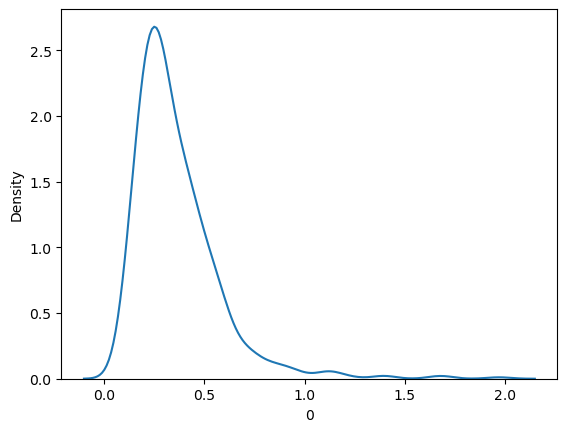

Skewness is :  -1.544844960819399


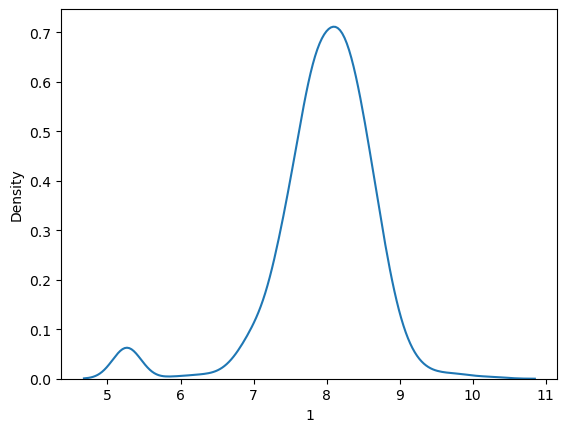

In [22]:
for i in output_array_df.columns:
    print("Skewness is : " , output_array_df[i].skew())
    sns.kdeplot(output_array_df[i])
    plt.show()

Now lets just do a little bit of beautifying 

In [23]:
def log_output(value):
    return np.log1p(value)

def function_transformer(array):

    output_array = np.empty(shape = array.shape)

    if len(array.shape) == 1:
        new_array = np.empty(shape = (1 , 1))
        for i in array:
            new_array = np.vstack([new_array , log_output(i)])

        new_array = np.delete(new_array , 0 , 0)

        return new_array

    else :
        for i in array:
        
            new_array = np.empty(shape = (1 , 1))
        
            for j in array[i]:
        
                new_array = np.vstack([new_array , log_output(j)])

            new_array = np.delete(new_array , 0 , 0)

            output_array = np.hstack([output_array , new_array])
            output_array = np.delete(output_array , 0 , 1)

        return output_array

# 5 | Ending 🏁

**THAT IT FOR TODAY GUYS**

**WE WILL GO DEEPER INTO THE DATA IN THE UPCOMING VERSIONS**

**PLEASE COMMENT YOUR THOUGHTS, HIHGLY APPRICIATED**

**DONT FORGET TO MAKE AN UPVOTE, IF YOU LIKED MY WORK $:)$**

<IMG SRC = "https://i.imgflip.com/19aadg.jpg">

**PEACE OUT $:)$**